# Imports

In [22]:
import sympy as sp
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [23]:
e = math.e

# Funções

### Definindo a Função e como calcular sua Derivada em um ponto X

In [24]:
def f(x):
    return 10 - 15*(e**(-0.1*x) - e**(-0.5*x)) - 4

In [25]:
def derivada(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

### Definindo as paths

In [26]:
#Editar as paths para o local onde os arquivos estão salvos

path_biss = "/Users/ianbittencourt/Zeros_Methods/resultados_biss.csv"
path_fals = "/Users/ianbittencourt/Zeros_Methods/resultados_fals.csv"
path_newton = "/Users/ianbittencourt/Zeros_Methods/resultados_newt.csv"
path_sec = "/Users/ianbittencourt/Zeros_Methods/resultados_sec.csv"
path_metodos = "/Users/ianbittencourt/Zeros_Methods/resultados_metodos.csv"

### Definindo o Método da Bissecção

In [27]:
def bissec(a, b, eps):
    iteracoes = []                                          # Lista para armazenar as iterações
    x = (a+b)/2                                             # Calcula o ponto médio
    iteracoes.append((a, b, f(a), f(b), x, f(x)))           # Adiciona a primeira iteração na lista iteracoes 
    while abs(f(x)) > eps:                                  # Enquanto a função no ponto médio for maior que a precisão, o ciclo continua sendo executado
        x = (a+b)/2                                         # Calcula o ponto médio novamente
        if f(a)*f(x) < 0:                                   # Se a função no ponto A multiplicada pela função no ponto médio for menor que 0, o ponto médio se torna o novo ponto B
            b = x
        else:                                               # Se não, o ponto médio se torna o novo ponto A
            a = x
        iteracoes.append((a, b, f(a), f(b), x, f(x)))       # Adiciona a iteração atual na lista iteracoes
    return x, iteracoes                                     # Retorna o valor de x e a lista de iterações


### Definindo o método da Falsa Posição

In [28]:
def false_pos(a, b, eps): 
    iteracoes = []                                          # Lista para armazenar as iterações
    x = (a*(f(b)) - b*(f(a)))/(f(b) - f(a))                 # Calcula o ponto x 
    iteracoes.append((a, b, f(a), f(b), x, f(x)))           # Adiciona a primeira iteração na lista iteracoes
    while abs(f(x))> eps:                                   # Enquanto a função no ponto x for maior que a precisão, o ciclo continua sendo executado
        x = (a*(f(b)) - b*(f(a)))/(f(b) - f(a))             # Calcula o ponto x novamente
        if f(a)*f(x) < 0:                                   # Se a função no ponto A multiplicada pela função no ponto x for menor que 0, o ponto x se torna o novo ponto B
            b = x
        else:                                               # Se não, o ponto x se torna o novo ponto A
            a = x
        iteracoes.append((a, b, f(a), f(b), x, f(x)))       # Adiciona a iteração atual na lista iteracoes
    return x, iteracoes

### Definindo o método de Newton-Raphson

In [29]:
def newton(x0, eps):
    iteracoes = []                                         # Lista para armazenar as iterações
    x = x0 - f(x0)/derivada(f, x0)                         # Calcula o ponto x
    iteracoes.append((x0, f(x0), x, f(x)))                 # Adiciona a primeira iteração na lista iteracoes
    while abs(f(x)) > eps:                                 # Enquanto a função no ponto x for maior que a precisão, o ciclo continua sendo executado
        x = x - f(x)/derivada(f, x)                        # Calcula o ponto x novamente
        iteracoes.append((x0, f(x0), x, f(x)))             # Adiciona a iteração atual na lista iteracoes
    return x, iteracoes                                    # Retorna o valor de x e a lista de iterações

### Definindo o método da Secante

In [30]:
def secante(a, b, eps):
    iteracoes = []                                         # Lista para armazenar as iterações
    c = (a*f(b) - b*f(a))/(f(b) - f(a))                    # Calcula o ponto c
    iteracoes.append((a, b, c, f(c)))                      # Adiciona a primeira iteração na lista iteracoes
    while abs(f(c)) > eps:                                 # Enquanto a função no ponto c for maior que a precisão, o ciclo continua sendo executado
        c = (a*f(b) - b*f(a))/(f(b) - f(a))                # Calcula o ponto c novamente
        iteracoes.append((a, b, c, f(c)))                  # Adiciona a iteração atual na lista iteracoes
        a = b                                              
        b = c                                              
    return c, iteracoes                                    # Retorna o valor de c e a lista de iterações

# Código 

In [31]:
# Solicitando os valores ao usuário
a = float(input("Defina o início do intervalo: "))
b = float(input("Defina o final do intervalo: "))
eps = float(input("Defina o erro: "))

# Executando os métodos e armazenando os resultados
resultados = {
    "Método": [],
    "Resultado": []
}

In [32]:
# Bissecção
x_bissec, iteracoes_bissec = bissec(a, b, eps)
df_iteracoes_bissec = pd.DataFrame(iteracoes_bissec, columns=['a', 'b', 'f(a)', 'f(b)', 'x', 'f(x)'])
df_iteracoes_bissec.to_csv(path_biss, index=False)
resultados["Método"].append("Bisseção")
resultados["Resultado"].append(x_bissec)

print("Resultados salvos em resultados_biss.csv")

Resultados salvos em resultados_biss.csv


In [33]:
# Falsa Posição
x_fals, iteracoes_fals = false_pos(a, b, eps)
df_iteracoes_fals = pd.DataFrame(iteracoes_fals, columns=['a', 'b', 'f(a)', 'f(b)', 'x', 'f(x)'])
df_iteracoes_fals.to_csv(path_fals, index=False)
resultados["Método"].append("Falsa Posição")
resultados["Resultado"].append(x_fals)

print("Resultados salvos em resultados_fals.csv")

Resultados salvos em resultados_fals.csv


In [34]:
# Método de Newton
x_newt, iteracoes_newt = newton(a, eps)
df_iteracoes_newt = pd.DataFrame(iteracoes_newt, columns=['x0', 'f(x0)', 'x', 'f(x)'])
df_iteracoes_newt.to_csv(path_newton, index=False)
resultados["Método"].append("Newton")
resultados["Resultado"].append(x_newt)

print("Resultados salvos em resultados_newt.csv")


Resultados salvos em resultados_newt.csv


In [35]:
# Método da Secante
x_sec, iteracoes_sec = secante(a, b, eps)
df_iteracoes_sec = pd.DataFrame(iteracoes_sec, columns=['a', 'b', 'c', 'f(c)'])
df_iteracoes_sec.to_csv(path_sec, index=False)
resultados["Método"].append("Método de Secante")
resultados["Resultado"].append(x_sec)

print("Resultados salvos em resultados_sec.csv")

Resultados salvos em resultados_sec.csv


In [36]:
# Salvando os resultados em um arquivo CSV
df_resultados = pd.DataFrame(resultados)
df_resultados.to_csv(path_metodos, index=False)
print("Resultados salvos em resultados_metodos.csv")

Resultados salvos em resultados_metodos.csv


# Apresentação de Resultados

In [37]:
df_iteracoes_bissec

,a,b,f(a),f(b),x,f(x)
0,1.000000,2.00000,1.525399,-0.762770,1.500000,0.174879
1,1.500000,2.00000,0.174879,-0.762770,1.500000,0.174879
2,1.500000,1.75000,0.174879,-0.338925,1.750000,-0.338925
3,1.500000,1.62500,0.174879,-0.094032,1.625000,-0.094032
4,1.562500,1.62500,0.037321,-0.094032,1.562500,0.037321
5,1.562500,1.59375,0.037321,-0.029118,1.593750,-0.029118
6,1.578125,1.59375,0.003909,-0.029118,1.578125,0.003909


In [38]:
df_iteracoes_fals

,a,b,f(a),f(b),x,f(x)
0,1.0,2.000000,1.525399,-0.762770,1.666646,-0.178212
1,1.0,1.666646,1.525399,-0.178212,1.666646,-0.178212
2,1.0,1.596909,1.525399,-0.035750,1.596909,-0.035750
3,1.0,1.583240,1.525399,-0.006946,1.583240,-0.006946


In [39]:
df_iteracoes_newt

,x0,f(x0),x,f(x)
0,1.0,1.525399,1.477923,0.224991
1,1.0,1.525399,1.576251,0.007895


In [40]:
df_iteracoes_sec

,a,b,c,f(c)
0,1.000000,2.000000,1.666646,-0.178212
1,1.000000,2.000000,1.666646,-0.178212
2,2.000000,1.666646,1.565018,0.031910
3,1.666646,1.565018,1.580452,-0.001034


In [41]:
df_resultados

,Método,Resultado
0,Bisseção,1.578125
1,Falsa Posição,1.583240
2,Newton,1.576251
3,Método de Secante,1.580452


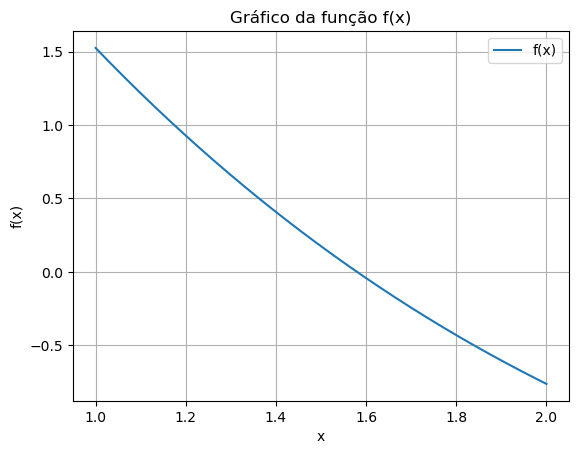

In [42]:
x = np.linspace(a, b, 400)  # 400 é a precisão do gráfico

# Calcular y como f(x)
y = f(x)

# Plotar o gráfico
plt.plot(x, y, label='f(x)')
plt.title('Gráfico da função f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)  # Adiciona a grade ao gráfico
plt.show()  # Mostra o gráfico